In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from neural_network import Model

In [2]:
file_name = 'ionosphere_data.csv'
data = pd.read_csv(file_name, header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
for i in range(data.shape[0]):
    if data.iloc[i,34] == 'g':
        data.iloc[i,34] = 1
    elif data.iloc[i,34] == 'b':
        data.iloc[i,34] = 0

y_data = data[34].to_numpy(dtype = np.float32).reshape(-1, 1)
y_data.shape

(351, 1)

In [4]:
data = data.drop([34], axis = 'columns')
x_data = data.to_numpy(dtype = np.float32)
x_data.shape

(351, 34)

In [5]:
#60% for training, 20% val, 20% test
train_bound = int(np.ceil(0.6*len(x_data)))
val_bound = int(np.ceil(0.8*len(x_data)))
indice = np.arange(len(x_data))
np.random.shuffle(indice)
x_data = x_data[indice]
y_data = y_data[indice]
train_x = x_data[:train_bound]
train_y = y_data[:train_bound]
val_x = x_data[train_bound:val_bound]
val_y = y_data[train_bound:val_bound]
test_x = x_data[val_bound:]
test_y = y_data[val_bound:]
print(train_x.shape, val_x.shape, test_x.shape)

(211, 34) (70, 34) (70, 34)


In [6]:
# build model and train
model = Model(train_x.shape[1], 'categorical_crossentropy', 3e-9)
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(2, activation = 'softmax')

epoch: 1|100, loss:185.763, performance:0.548, val_performance:0.537
epoch: 2|100, loss:185.763, performance:0.548, val_performance:0.537
epoch: 3|100, loss:185.763, performance:0.551, val_performance:0.537
epoch: 4|100, loss:185.763, performance:0.551, val_performance:0.54
epoch: 5|100, loss:185.763, performance:0.551, val_performance:0.54
epoch: 6|100, loss:185.763, performance:0.552, val_performance:0.54
epoch: 7|100, loss:185.763, performance:0.552, val_performance:0.54
epoch: 8|100, loss:185.763, performance:0.552, val_performance:0.54
epoch: 9|100, loss:185.763, performance:0.552, val_performance:0.54
epoch:10|100, loss:185.763, performance:0.553, val_performance:0.54
epoch:11|100, loss:185.763, performance:0.553, val_performance:0.54
epoch:12|100, loss:185.763, performance:0.554, val_performance:0.54
epoch:13|100, loss:185.763, performance:0.554, val_performance:0.54
epoch:14|100, loss:185.763, performance:0.554, val_performance:0.544
epoch:15|100, loss:185.763, performance:0.55

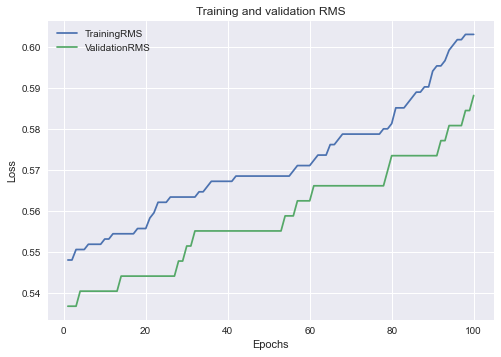

In [7]:
model.fit(train_x, train_y, 100, 32, True, val_x, val_y)

0.6322448979591837


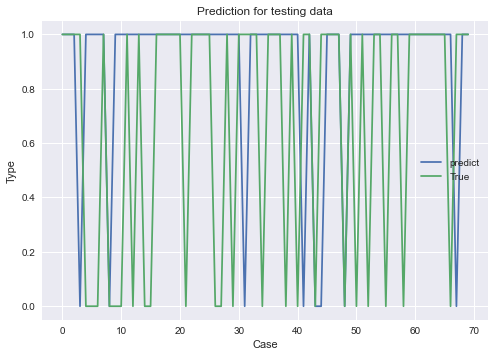

In [8]:
# test
y_pred = np.argmax(model.predict(test_x), axis = 1)
print(model.evaluate_performance(model.predict(test_x), test_y))
plt.plot(y_pred, label = 'predict')
plt.plot(test_y, label = 'True')
plt.title('Prediction for testing data')
plt.xlabel('Case')
plt.ylabel('Type')
plt.legend()
plt.show()

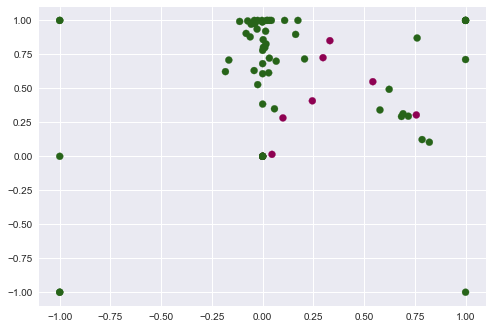

In [9]:
#plotting the distribution of latent features at 100 training stage
y_pred = np.argmax(model.predict(test_x), axis = 1)
plt.scatter(test_x[:,5],test_x[:,6],c = y_pred,cmap='PiYG')

In [10]:
model = Model(34, 'categorical_crossentropy', 3e-9)
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(2, activation = 'softmax')

epoch: 1|20, loss:185.763, performance:0.502, val_performance:0.533
epoch: 2|20, loss:185.763, performance:0.502, val_performance:0.533
epoch: 3|20, loss:185.763, performance:0.503, val_performance:0.537
epoch: 4|20, loss:185.763, performance:0.504, val_performance:0.537
epoch: 5|20, loss:185.763, performance:0.506, val_performance:0.54
epoch: 6|20, loss:185.763, performance:0.508, val_performance:0.54
epoch: 7|20, loss:185.763, performance:0.508, val_performance:0.54
epoch: 8|20, loss:185.763, performance:0.51, val_performance:0.54
epoch: 9|20, loss:185.763, performance:0.512, val_performance:0.54
epoch:10|20, loss:185.763, performance:0.512, val_performance:0.54
epoch:11|20, loss:185.763, performance:0.512, val_performance:0.54
epoch:12|20, loss:185.763, performance:0.515, val_performance:0.544
epoch:13|20, loss:185.763, performance:0.515, val_performance:0.544
epoch:14|20, loss:185.763, performance:0.516, val_performance:0.548
epoch:15|20, loss:185.763, performance:0.517, val_perfor

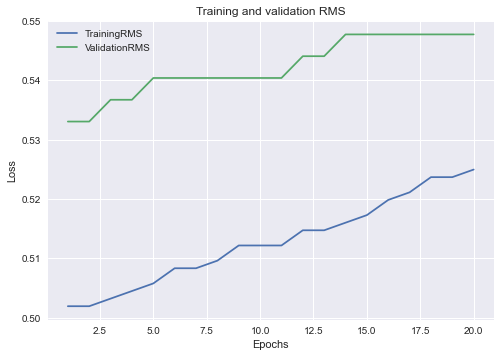

accuracy in testing data 0.5489795918367346


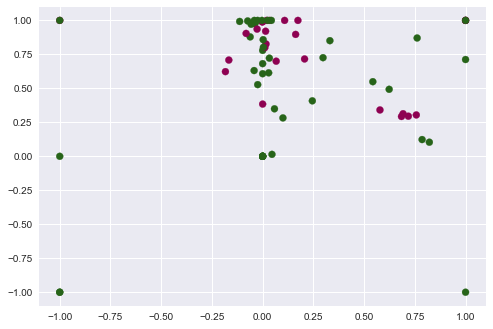

In [11]:
#plotting the distribution of latent features at 20 training stage
model.fit(train_x, train_y, 20, 32, True, val_x, val_y)
y_pred = np.argmax(model.predict(test_x), axis = 1)
print('accuracy in testing data',model.evaluate_performance(model.predict(test_x), test_y))
plt.scatter(test_x[:,5],test_x[:,6],c = y_pred,cmap='PiYG')

epoch: 1|100, loss:185.763, performance:0.369, val_performance:0.379
epoch: 2|100, loss:185.763, performance:0.38, val_performance:0.386
epoch: 3|100, loss:185.763, performance:0.405, val_performance:0.401
epoch: 4|100, loss:185.763, performance:0.42, val_performance:0.419
epoch: 5|100, loss:185.763, performance:0.434, val_performance:0.423
epoch: 6|100, loss:185.763, performance:0.448, val_performance:0.449
epoch: 7|100, loss:185.763, performance:0.464, val_performance:0.46
epoch: 8|100, loss:185.763, performance:0.478, val_performance:0.478
epoch: 9|100, loss:185.763, performance:0.493, val_performance:0.489
epoch:10|100, loss:185.763, performance:0.512, val_performance:0.496
epoch:11|100, loss:185.763, performance:0.526, val_performance:0.518
epoch:12|100, loss:185.763, performance:0.54, val_performance:0.533
epoch:13|100, loss:185.763, performance:0.568, val_performance:0.555
epoch:14|100, loss:185.763, performance:0.577, val_performance:0.566
epoch:15|100, loss:185.763, performanc

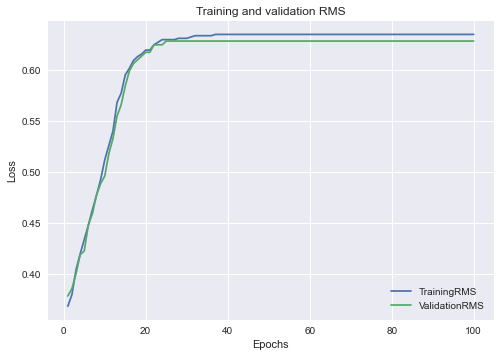

In [12]:
# change network structure to 16-16-16, tarin 100 epochs
model = Model(train_x.shape[1], 'categorical_crossentropy', 3e-9)
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(2, activation = 'softmax')
model.fit(train_x, train_y, 100, 32, True, val_x, val_y)

accuracy in testing data 0.6714285714285715


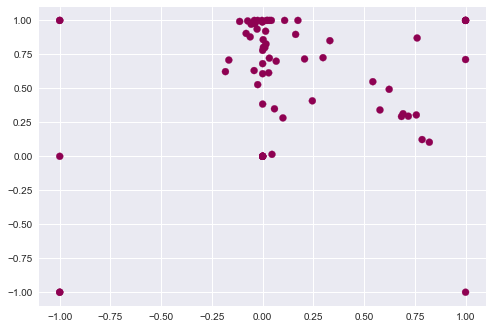

In [13]:
# test 16-16-16 model
y_pred = np.argmax(model.predict(test_x), axis = 1)
print('accuracy in testing data',model.evaluate_performance(model.predict(test_x), test_y))
plt.scatter(test_x[:,5],test_x[:,6],c = y_pred,cmap='PiYG')

epoch: 1|20, loss:185.763, performance:0.577, val_performance:0.559
epoch: 2|20, loss:185.763, performance:0.589, val_performance:0.588
epoch: 3|20, loss:185.763, performance:0.599, val_performance:0.592
epoch: 4|20, loss:185.763, performance:0.604, val_performance:0.599
epoch: 5|20, loss:185.763, performance:0.624, val_performance:0.614
epoch: 6|20, loss:185.763, performance:0.629, val_performance:0.621
epoch: 7|20, loss:185.763, performance:0.631, val_performance:0.621
epoch: 8|20, loss:185.763, performance:0.631, val_performance:0.621
epoch: 9|20, loss:185.763, performance:0.631, val_performance:0.621
epoch:10|20, loss:185.763, performance:0.631, val_performance:0.625
epoch:11|20, loss:185.763, performance:0.633, val_performance:0.625
epoch:12|20, loss:185.763, performance:0.634, val_performance:0.625
epoch:13|20, loss:185.763, performance:0.634, val_performance:0.625
epoch:14|20, loss:185.763, performance:0.634, val_performance:0.625
epoch:15|20, loss:185.763, performance:0.635, va

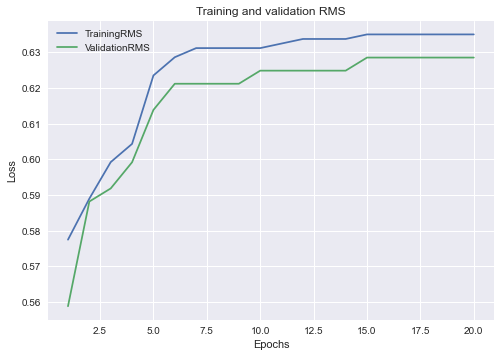

In [14]:
# change network structure to 16-16-16
model = Model(train_x.shape[1], 'categorical_crossentropy', 3e-9)
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(2, activation = 'softmax')
model.fit(train_x, train_y, 20, 32, True, val_x, val_y)

accuracy in testing data 0.6714285714285715


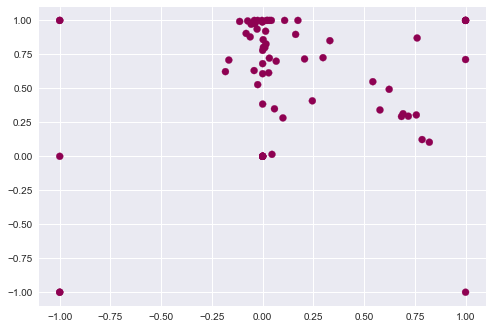

In [15]:
# test 16-16-16 model
y_pred = np.argmax(model.predict(test_x), axis = 1)
print('accuracy in testing data',model.evaluate_performance(model.predict(test_x), test_y))
plt.scatter(test_x[:,5],test_x[:,6],c = y_pred,cmap='PiYG')